# K-Means Clustering

## Experiment-9

10/10/2023

URK21CS7002

### AIM

To cluster the datasets using K-Mean clustering technique

### Description

#### What is unsupervised learning

Unsupervised learning is a machine learning paradigm where the algorithm analyzes data without labeled outputs. It aims to discover patterns, structures, or relationships within the data. Common techniques include clustering, like K-means, for grouping similar data points, and dimensionality reduction, such as PCA, for simplifying complex data while retaining essential information. Unsupervised learning has applications in clustering, anomaly detection, and data compression.

#### What are the applications of clustering techniques?

- Customer segmentation
- Image segmentation
- Document clustering
- Anomaly detection
- DNA sequencing
- Recommender systems
- Natural language processing
- Social network analysis
- Market research
- Speech recognition

#### Algorithm for kmeans clustering

The k-means clustering algorithm is a popular method for partitioning a dataset into clusters. Here's a high-level overview of the algorithm:

1. **Initialization**: Select 'k' initial cluster centroids (points representing cluster centers).
2. **Assignment**: Assign each data point to the nearest centroid, forming 'k' clusters.
3. **Update Centroids**: Recalculate the centroids as the mean of the data points in each cluster.
4. **Repeat**: Repeat steps 2 and 3 until convergence (when centroids no longer change significantly) or for a specified number of iterations.
5. **Output**: The final cluster assignments and centroids.

This process continues iteratively until the centroids stabilize or the maximum number of iterations is reached. K-means aims to minimize the sum of squared distances between data points and their assigned centroids.

#### Python libraries & Function for kmeans

Here's a list of Python libraries and functions commonly used for k-means clustering:

1. **scikit-learn**:
   - `KMeans` from `sklearn.cluster` for k-means clustering.

2. **NumPy**:
   - Functions for numerical operations and manipulation of data.

3. **matplotlib** or **seaborn**:
   - Data visualization libraries for plotting and visualizing clusters.

4. **SciPy**:
   - For additional scientific and statistical tools that can complement clustering.

5. **Pandas**:
   - Useful for data manipulation and preprocessing before applying k-means.

6. **Yellowbrick**:
   - Provides visual tools for model selection, diagnostics, and evaluation, including cluster visualization.

7. **OpenCV**:
   - For computer vision tasks, including image segmentation with k-means.

You can use these libraries in Python to perform k-means clustering and associated tasks.



# 

### Live.csv

In [222]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [223]:
data = pd.read_csv("Live.csv")

In [224]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [225]:
data.drop(['status_published','Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [226]:
data.columns

Index(['status_id', 'status_type', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys'],
      dtype='object')

In [227]:
X = data

y = data['status_type']

In [228]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)
cols = X.columns

In [229]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [230]:
X = pd.DataFrame(X, columns=[cols])

In [231]:
from sklearn.cluster import KMeans
wcss=[]

import warnings
warnings.filterwarnings('ignore')

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

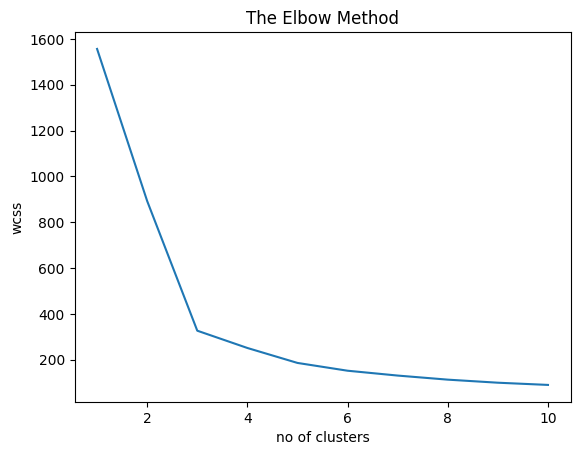

In [232]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [233]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [234]:
print(type(kmeans.labels_))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [235]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 424 out of 7050 samples were correctly labeled.


# 

### IRIS.csv

In [236]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [237]:
data = pd.read_csv("IRIS.csv")

In [238]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [239]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [240]:
X = data

y = data['species']

In [241]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['species'] = le.fit_transform(X['species'])
y = le.transform(y)
cols = X.columns

In [242]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [243]:
X = pd.DataFrame(X, columns=[cols])

In [244]:
from sklearn.cluster import KMeans
wcss=[]

import warnings
warnings.filterwarnings('ignore')

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

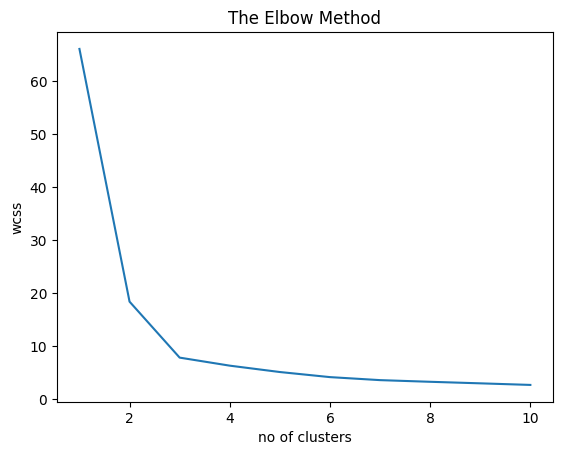

In [245]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [246]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [247]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 100 out of 150 samples were correctly labeled.


# 

### Online Retail.csv

In [272]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [273]:
data = pd.read_csv("Online Retail.csv")

In [274]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8.26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8.26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8.26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8.26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8.26,3.39,17850.0,United Kingdom


In [275]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [276]:
data.drop(['InvoiceNo', 'Description', 'InvoiceDate', 'StockCode'], axis=1, inplace=True)

data.dropna(inplace=True)

In [277]:
X = data

y = data['Country']

In [278]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Country'] = le.fit_transform(X['Country'])
y = le.transform(y)
cols = X.columns

In [279]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [280]:
X = pd.DataFrame(X, columns=[cols])

In [281]:
from sklearn.cluster import KMeans
wcss=[]

import warnings
warnings.filterwarnings('ignore')

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

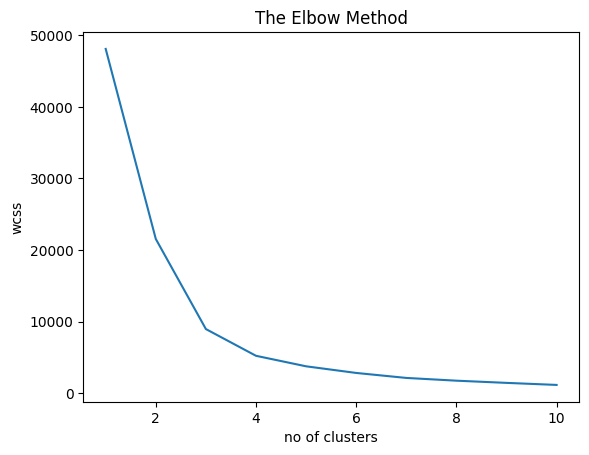

In [282]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [283]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [284]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 1259 out of 406829 samples were correctly labeled.


# 

### Result

K Means Clustering was done on the given datasets.